### Grupo B04
### Miguel Egido Morales, Alfredo Robledano Abasolo, Ana Robledano Abasolo


# P1 AA Configuración y Entrenamiento de una Red de Neuronas

Utilizaremos la **biblioteca Python Keras** para **clasificar** artículos de ropa.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de prendas de ropa (28 x 28 píxeles) en sus 10 categorías (de 0 a 9, guardadas en etiquetas).
- Usaremos 60K imágenes de entrenamiento y más de 10K imágenes de prueba
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras
- Tenemos las siguientes categorías o **clases** del problema de clasificación de ropa: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**

Importamos el paquete tensorflow que contiene a la librería keras

In [97]:
import tensorflow as tf
tf.__version__ >= '2.0.0'  # Comprobamos que estamos usando al menos la versión 2.0.0

True

El módulo keras.datasets contiene un dataset con imágenes de ropa que usaremos para este proyecto.\
Las imágenes se encuentran convenientemente etiquetadas y en formato mnist.\
A continuación almacenamos en memoria las imágenes de entrenamiento  e imágenes de test (junto con sus etiquetas).

In [98]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(type(train_images), train_images.shape, train_labels.shape)
print(type(test_images), test_images.shape, test_labels.shape)

<class 'numpy.ndarray'> (60000, 28, 28) (60000,)
<class 'numpy.ndarray'> (10000, 28, 28) (10000,)


Observamos que train_images y test_images son numpy.arrays de 3 dimensiones.\
60_000 imágenes de 28x28 pixels para el entrenamiento (60_000 etiquetas).\
10_000 imágenes de 28x28 pixels para test (10_000 etiquetas).

Comprobamos que las etiquetas van de 0 a 9

In [99]:
print(set(train_labels))
print(set(test_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Echemos un vistazo a alguna imagen del set de entrenamiento (son numpy arrays 2D)\
Por ejemplo la número 30_000\
Para ello importamos numpy, de forma que podamos cambiar las opciones de impresión

In [100]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30_000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

A simple vista ningún problema\
Los valores de la matriz 2D asociada a la imagen están entre 0 y 255.\
Podemos ver su etiqueta asociada, 3.

In [101]:
print(train_labels[30_000])

3


Viendo la documentación sabemos que se trata de un vestido por ser el valor 3. (3: Dress)\
No obstante podemos usar el paquete matplotlib para ver como es la imagen

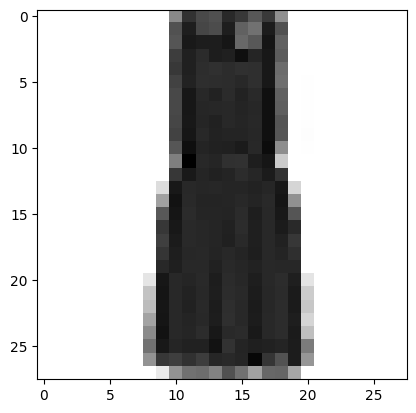

In [102]:
import matplotlib.pyplot as plt
ropa = train_images[30000]
plt.imshow(ropa, cmap=plt.cm.binary) # el num más bajo se pone en color blanco, y el más alto en negro
plt.show()

Abrimos también una imagen del set de test.

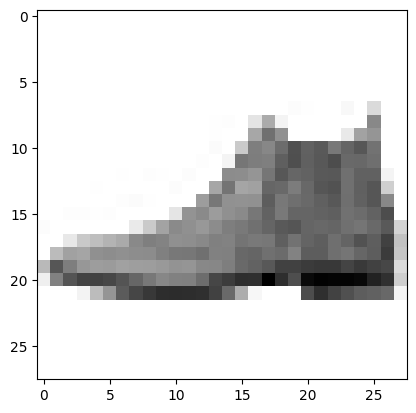

In [103]:
import matplotlib.pyplot as plt
ropa = test_images[0]
plt.imshow(ropa, cmap=plt.cm.binary) # Veamos el elemento 0 del set de tests y pintémoslo con matplotlib
plt.show()

Un zapato, no cabe duda

In [104]:
print(test_labels[0])

9


Así lo indica su etiqueta (9: shoe)


La función de keras keras.layers.Flatten() nos podría ser útil para aplanar la entrada .... (falta info)

## Cuestiones

### 1. Configurar y entrenar los siguientes modelos de red de neuronas

A continuación establecemos los parámetros de configuración solicitados\
Utilizaremos namedtuples como contenedores de las configuraciones\
Nota: Las configuraciones de este tipo recomendaríamos tenerlas en un script aparte

In [105]:
from collections import namedtuple

neuronas_capa1 = (10, 10, 10, 10, 512, 512, 512, 512)
funcion_activacion = ("relu", "relu", "sigmoid", "sigmoid", "relu", "relu", "sigmoid", "sigmoid")
optimizador = ("sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop")

param_rn = namedtuple("Param_RN",
                      ["neuronas_capa1","funcion_activacion","optimizador"])

rn_configs = [param_rn(*params) for params in zip(neuronas_capa1,
                                                  funcion_activacion,
                                                  optimizador)]
print(rn_configs[0])

Param_RN(neuronas_capa1=10, funcion_activacion='relu', optimizador='sgd')


Adicionalmente se utilizará:
* función de perdida 'categorical_crossentropy'
* métrica de precisión
* 5 épocas

**CONSTRUIMOS LA RNA**
- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**

El tipo de modelo para nuestras redes será secuencial y utilizaremos 2 capas densas (cada neurona está conectada a todas las demás de esa capa).
Las redes constarán de dos capas densas:
* **Capa 1** contiene el número de neuronas y su función de activación (ambos especificados en el enunciado)
* **Capa 2** contiene 10 neuronas (una para cada tipo de ropa) y función de activación softmax.
Esta última capa nos servirá para saber como de bien lo ha hecho la red, al devolvernos una matriz de 10 puntuaciones de probabilidad (sumando 1)

La puntuación será la probabilidad de que la imagen pertenezca a una de nuestras clases de 10 tipos de prendas.



In [106]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models  # importamos de keras las librerías de modelos y de capas (layers)
from keras import layers

networks = []
for config in rn_configs:
  network = models.Sequential()
  # Primera capa (configuración enunciado)
  network.add(layers.Dense(units=config.neuronas_capa1,
                           activation=config.funcion_activacion,
                           input_shape=(28,28,)))
  # Segunda capa (10 neuronas y softmax)
  network.add(layers.Dense(10, activation='softmax'))
  networks.append(network)

# Por ejemplo, vemos la primera network de nuestra lista de networks
networks[0].summary()



Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 28, 10)            290       
                                                                 
 dense_129 (Dense)           (None, 28, 10)            110       
                                                                 
Total params: 400 (1.56 KB)
Trainable params: 400 (1.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observamos que para la primera red neuronal (networks[0]), tenemos un total de 7960 parámetros que se obtienen como resultado de *nº de neuronas x nº de entradas + sesgos* de cada capa ya que las capas son densas.

*   **Capa 1:** 10 x 784 + 10 = 7850
*   **Capa 2:** 10 x 10 + 10 = 110
*   **TOTAL:** 7850 + 110 = 7960

Para terminar de preparar la red, debemos elegir:
- Una **función de pérdida**: utilizaremos la función de pérdida `categorical_crossentropy` que mide la discrepancia entre las predicciones de un modelo y las respuestas reales en problemas de clasificación con múltiples categorías. Calcula la diferencia entre las distribuciones de probabilidad predichas y las verdaderas, utilizando la entropía cruzada como métrica.

- Un **optimizador**: dependiendo del caso usaremos los optimizadores `sgd` o `rmsprop`.
  

1.   SGD (Descenso de Gradiente Estocástico): Actualiza los pesos en dirección opuesta al gradiente de la función de pérdida. "Estocástico" significa que utiliza muestras de datos de manera aleatoria para calcular el gradiente, lo que puede ayudar a evitar mínimos locales.
2.   RMSprop (Root Mean Square Propagation): Modifica el SGD para adaptarse a tasas de aprendizaje diferentes para cada parámetro. Almacena una media móvil ponderada de los cuadrados de los gradientes anteriores y utiliza esta información para normalizar la tasa de aprendizaje.


- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).

In [96]:
# Cargamos el optimizador, la función de pérdida y las métricas
for i, config in enumerate(rn_configs):
  networks[i].compile(optimizer=config.optimizador,
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) # si de cada 10 imágenes acierta 8, tiene un accuracy del 80%

La función de pérdida crossentropy se utiliza como señal
de retroalimentación para aprender los tensores de peso y que la fase de
entrenamiento intentará minimizar.\
La reducción de la pérdida se produce mediante el descenso de gradiente
estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
'rmsprop'.

# Normalización de los datos
para facilitar que converja el proceso de entrenamiento preparamos los datos de imagen con alguna transformación. Los tensores transformados tienen la misma cantidad de datos total que el tensor inicial.

Utilizaremos la función

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # TODO: usar flatten decir que es y este equivalente
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [ ]:
train_images = train_images.astype('float32') / 255
print(np.matrix(train_images[3000]))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Codificaremos categoricamente las etiquetas en one-hot encoding, transformando las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta:

In [ ]:
# Preparación de las etiquetas
import numpy as np
from keras import utils
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# El número 30000 de entrenamiento es un 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

En el array de la etiqueta 30000, el 1 está en la posición 3 ya que se trata del índice 3 (Dress).

# Entrenamiento de las redes neuronales


*   Nº de épocas: Usaremos 5 épocas (la red pasará 5 veces por el conjunto de datos) para
separar el entrenamiento en 5 fases, dividir el entrenamiento en épocas es útil para el registro y la evaluación periódica
*   Tamaño del lote (batch size): tomamos paquetes de 128 imágenes, para calcular la media de las pérdidas y ajustar los parámetros cada 128 imágenes.



In [ ]:
networks[0].fit(train_images, train_labels, epochs=5, batch_size=128)
# TODO: networks[0].save('nombre')
# save the neural network as a SavedModel
tf.saved_model.save(networks[0], 'saved_model')

# load the neural network from the SavedModel
neuronal_network = tf.saved_model.load('saved_model')

RuntimeError: ignored

La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
muestras, 5 veces. En cada iteración, la red computará los gradientes de
los pesos en relación con la pérdida en el lote y ajustará los pesos en
consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
de gradiente (469 por repetición), la pérdida será lo bastante baja como para
que la red sea capaz de clasificar números escritos a mano con gran exactitud.

In [ ]:
for network in networks:
  networks[network].fit(train_images, train_labels, epochs=5, batch_size=128)

En cada iteración, la red computará los gradientes de los pesos en relación con la pérdida en el lote y ajustará los pesos en consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes de gradiente (469 por repetición), la pérdida será lo bastante baja como para que la red sea capaz de clasificar números escritos a mano con gran exactitud.